# **Goal: Classifying Fraudulent and Valid Transactions**

**This dataset is generated from a simulation that closely resembles the normal day-to-day transactions including the occurrence of fraudulent transactions.**

**Analyze By: Puyush Gupta**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
data = pd.read_csv('Fraud.csv')
data.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0


# **Exploratory Data Analysis:**

In [2]:
data.shape

(6362620, 11)

In [3]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.isna().sum() 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Observation: There are no missing values. No imputation is required until further notice**

C:\Users\puyus\AppData\Local\Temp\ipykernel_40780\1694336155.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='hot')


<Axes: >

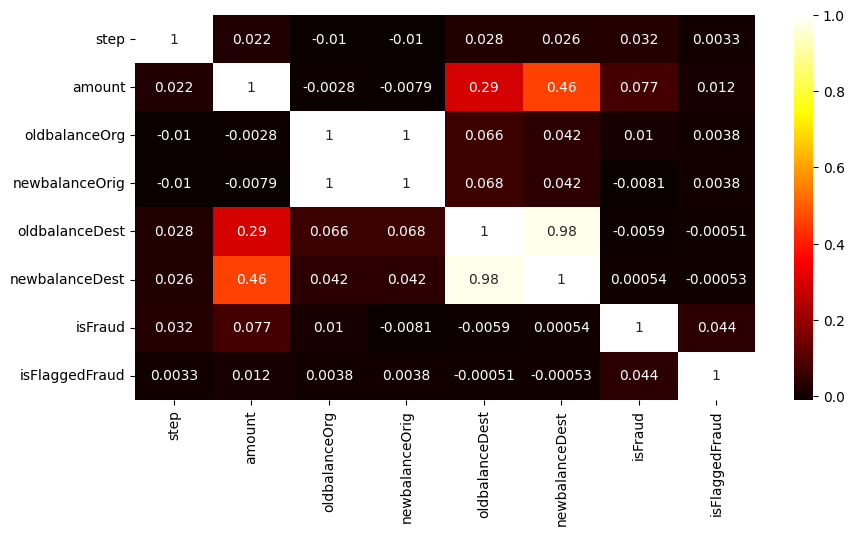

In [6]:
# Correlation of columns with each other
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='hot')

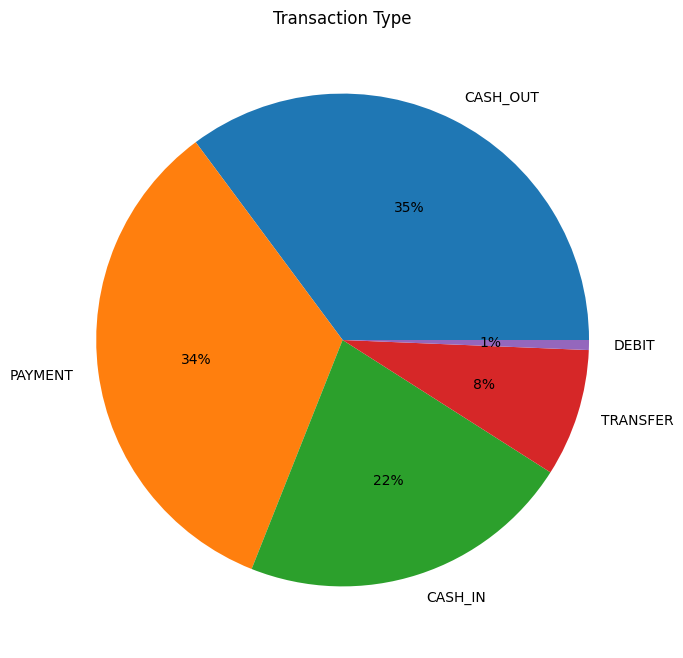

In [7]:
# Proportion of each Transaction type
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

In [8]:
# Number of Transactions in each TimeStep
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

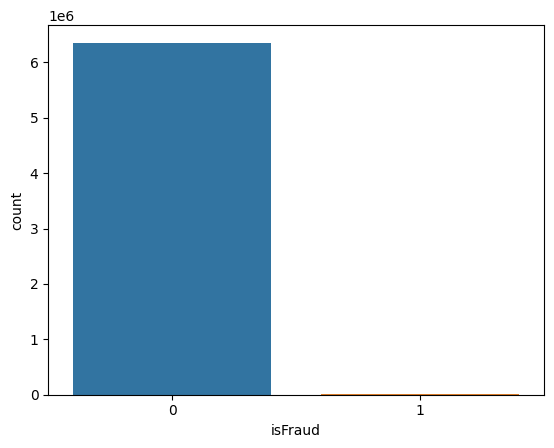

In [9]:
# How many Transactions are fraud in the dataset?
sns.countplot(data=data,x='isFraud')

In [10]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
# Let's check for duplicated rows in the dataset
print('Number of duplicates are : ', data.duplicated().sum())

Number of duplicates are :  0


**According to the overview of the dataset:**

**This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.**

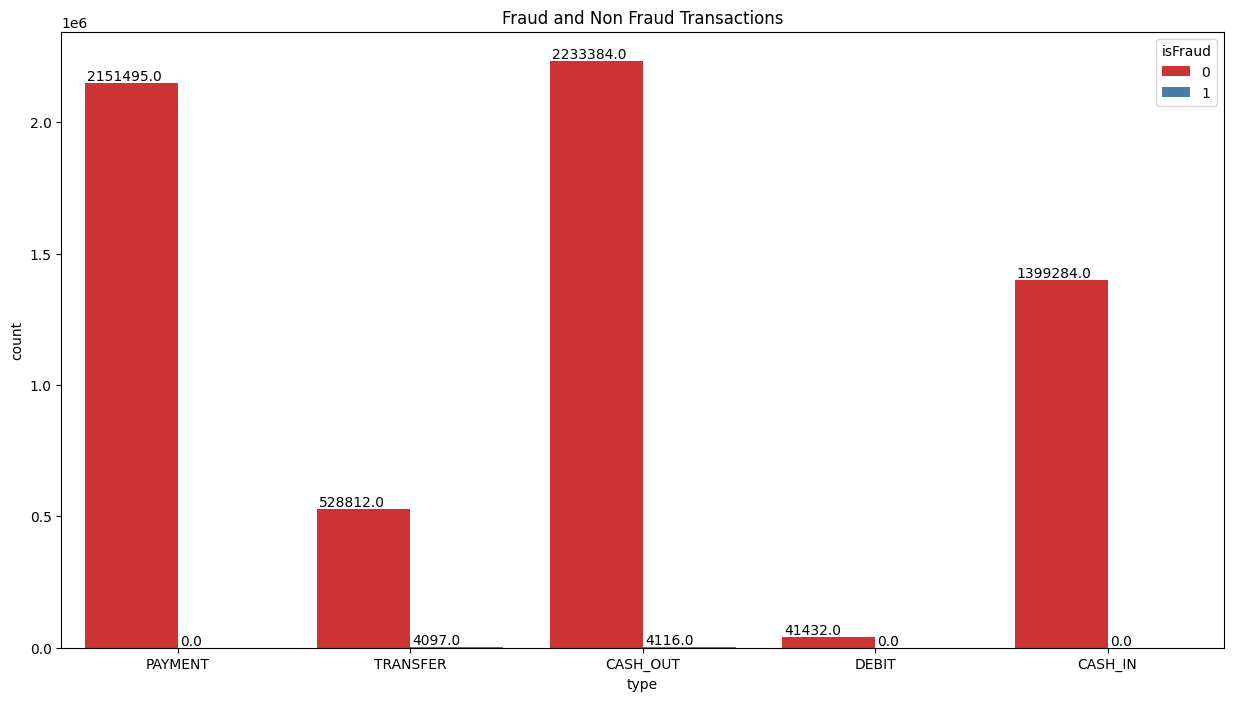

In [12]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data = data, x = "type", hue="isFraud", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

In [13]:
transfer_fraud = data[((data['type']=='TRANSFER') & data['isFraud']==1)]
transfer_fraud['nameOrig'].value_counts()

C1305486145    1
C202278158     1
C12585107      1
C946427395     1
C1069177491    1
              ..
C2090764492    1
C1794935564    1
C318078280     1
C939293281     1
C1685995037    1
Name: nameOrig, Length: 4097, dtype: int64

In [14]:
cash_out_fraud = data[(data['type'] == 'CASH_OUT') & (data['isFraud'] == 1)]
cash_out_fraud['nameDest'].value_counts()

C200064275     2
C1399829166    2
C1650668671    2
C2129197098    2
C1013511446    2
              ..
C1566713324    1
C1955464150    1
C1104137869    1
C377165949     1
C873221189     1
Name: nameDest, Length: 4091, dtype: int64

**Observation:**

1. **Our fraud transactions are done in TRANSFER and CASH_OUT transaction type.**

2. **The fraud transactions in TRANSFER were 4097 and CASH_OUT were 4116.**

**Let's check for Account Types:**

**One feature of the dataset that is not directly present is the account types "C" (customer) and "M", which would be the first character for each value under nameOrig and nameDest. Could this be a predictor?**

In [2]:
data['type2'] = np.nan
data.loc[data['nameOrig'].str.contains('C') & data['nameDest'].str.contains('C'), 'type2'] = 'CC'
data.loc[data['nameOrig'].str.contains('C') & data['nameDest'].str.contains('M'), 'type2'] = 'CM'
data.loc[data['nameOrig'].str.contains('M') & data['nameDest'].str.contains('C'), 'type2'] = 'MC'
data.loc[data['nameOrig'].str.contains('M') & data['nameDest'].str.contains('C'), 'type2'] = 'MM'

**Now we're going to see the number of fraud and valid transactions according to the type 2 that tells if the transaction was done from customer to customer, customer to merchant, merchant to customer or merchant to merchant.**

In [3]:
# Dividing the dataset into observations with fraud and valid transactions:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

print("Fraud transactions by type2: \n",fraud.type2.value_counts())
print("\nValid transactions by type2: \n",valid.type2.value_counts())

Fraud transactions by type2: 
 CC    8213
Name: type2, dtype: int64

Valid transactions by type2: 
 CC    4202912
CM    2151495
Name: type2, dtype: int64


**Observation: The fraud transactions were generally from Customer to Customer**

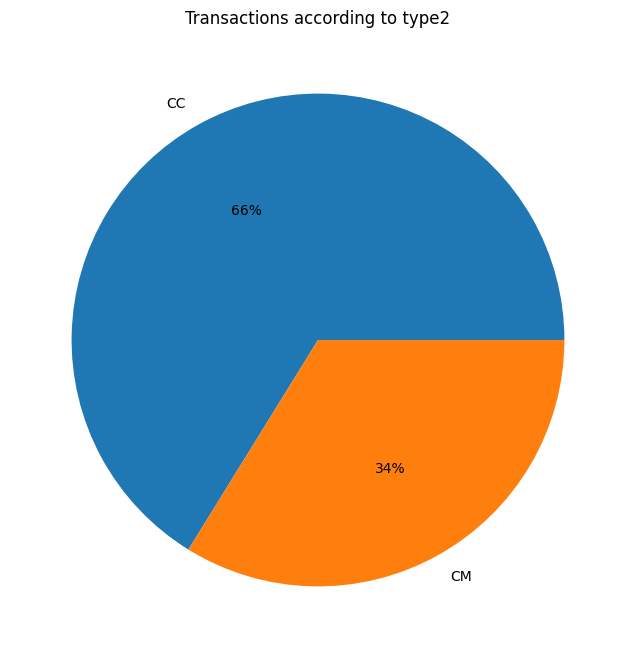

In [17]:
plt.figure(figsize=(15,8))
plt.pie(data.type2.value_counts().values,labels=data.type2.value_counts().index, autopct='%.0f%%')
plt.title("Transactions according to type2")
plt.show()

**Let's check for Transaction Types:**

In [18]:
print("Fraud transactions by type: \n",fraud.type.value_counts())
print("\nValid transactions by type: \n",valid.type.value_counts())

Fraud transactions by type: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

Valid transactions by type: 
 CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


**Observation: It seems that fraud transactions only occur when the transaction type is CASH_OUT or TRANSFER.**

In [4]:
# Assume that transaction only occur when transaction type is either CASH_OUT or TRANSFER.
# No need to take subset for the fraud dataset because all of their transaction types are either TRANSFER or CASH_OUT

valid = valid[(valid["type"] == "CASH_OUT")| (valid["type"] == "TRANSFER")]
data = data[(data["type"] == "CASH_OUT") | (data["type"] == "TRANSFER")]

print(data.shape)

(2770409, 12)


In [20]:
data[(data["isFraud"] == 1) & (data['type2'] == 'CC')].shape

(8213, 12)

**Observation:** 

**As each fraudlent transaction is from Customer to Customer which has transaction type: 'CASH_OUT' or 'TRANSFER". So, we remove type2 column too**

**Let's check for balances before and after the transaction:**

In [21]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"])

print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  94.0
Percentage of observations with balance errors in the account receiving money:  42.0


**Many of the observations have inaccurately portrayed what happens to the account receiving money and the account sending money.**

**Let's assume:**

1. **The most a sender can give is how much he is having in their account.**

2. **The most a receiver should have in their account is the amount given to them in the transaction.**

In [22]:
relevant_cols = data[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].values.flatten()

# number of observations where the amount given is greater than the amount that is in the giver's account
num_amt_oldgiver = sum(data["amount"] > data["oldbalanceOrg"]) 

# number of observations where the amount received is greater than the amount that is in the receiver's account
num_amt_newreceiver = sum(data["amount"] > data["newbalanceDest"]) 

print("number of observations where the amount given is greater than the amount that is in the giver's account: ", num_amt_oldgiver)

print("number of observations where the amount received is greater than the amount that is in the receiver's account: ", num_amt_newreceiver)

number of observations where the amount given is greater than the amount that is in the giver's account:  2488634
number of observations where the amount received is greater than the amount that is in the receiver's account:  36802


In [23]:
data[(data['isFraud'] == 1) & (data["amount"] > data["newbalanceDest"])]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type2
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.0,1,0,CC
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0,CC
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.0,1,0,CC
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0,CC
...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0,CC
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0,CC
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0,CC
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0,CC


In [24]:
num_wrong_bal = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]) | (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors: ", 100*round(sum(num_wrong_bal)/len(data),2))

Percentage of observations with balance errors:  96.0


**Result:**

1. **Hypotheses 1 have been rejected.**

2. **Hyopthesis 2 is also rejected as there are valid transactions when even data["amount"] > data["newbalanceDest"] is true**

In [5]:
# adding features errorBalanceOrg, errorBalanceDest
data["errorBalanceOrg"] = data.newbalanceOrig + data.amount - data.oldbalanceOrg
data["errorBalanceDest"] = data.oldbalanceDest + data.amount - data.newbalanceDest

fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [26]:
print("Summary statistics of errorBalanceOrg for fraudulent transactions: \n",fraud["errorBalanceOrg"].describe())
print("\n Summary statistics of errorBalanceOrg for valid transactions: \n",valid["errorBalanceOrg"].describe())

Summary statistics of errorBalanceOrg for fraudulent transactions: 
 count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: errorBalanceOrg, dtype: float64

 Summary statistics of errorBalanceOrg for valid transactions: 
 count    2.762196e+06
mean     2.868035e+05
std      8.763752e+05
min     -1.000000e-02
25%      5.261343e+04
50%      1.442008e+05
75%      2.804663e+05
max      9.244552e+07
Name: errorBalanceOrg, dtype: float64


In [27]:
print("Summary statistics of errorBalanceDest for fraudulent transactions: \n",fraud["errorBalanceDest"].describe())
print("\n Summary statistics of errorBalanceDest for valid transactions: \n",valid["errorBalanceDest"].describe())

Summary statistics of errorBalanceDest for fraudulent transactions: 
 count    8.213000e+03
mean     7.325093e+05
std      1.867748e+06
min     -8.875516e+06
25%      0.000000e+00
50%      2.231460e+03
75%      4.427220e+05
max      1.000000e+07
Name: errorBalanceDest, dtype: float64

 Summary statistics of errorBalanceDest for valid transactions: 
 count    2.762196e+06
mean    -3.091033e+04
std      5.840943e+05
min     -7.588573e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.977761e+06
Name: errorBalanceDest, dtype: float64


**From the summary statistics of the errorBalanceDest variable, the errors are huge in both directions (both fraudulent and valid transactions have large positive and negative errors in the accounts where money has been moved to.)**

In [28]:
print("Proportion of fraudulent transactions with errorBalanceDest > 0: ", len(fraud[fraud.errorBalanceDest > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceDest > 0: ", len(valid[valid.errorBalanceDest > 0])/len(valid))
print("Proportion of fraudulent transactions with errorBalanceOrg > 0: ", len(fraud[fraud.errorBalanceOrg > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceOrg > 0: ", len(valid[valid.errorBalanceOrg > 0])/len(valid))

Proportion of fraudulent transactions with errorBalanceDest > 0:  0.5712894192134421
Proportion of valid transactions with errorBalanceDest > 0:  0.19744942067832985
Proportion of fraudulent transactions with errorBalanceOrg > 0:  0.006331425788384269
Proportion of valid transactions with errorBalanceOrg > 0:  0.9067180605576143


**Observation:**

1. **The spread of errors in both the balanceOrg and balanceDest variables are large, however valid transactions are much more likely to have an errorBalanceOrg > 0.**

2. **Similarly, fraudulent transactions are much more likely to have errorBalanceDest > 0 than valid transactions.**

3. **In addition, only valid transactions have errorBalanceDest > 10,000,000**

**These distinctions and probably more, make errorBalanceDest and errorBalanceOrg potentially effective features.**

In [29]:
# Let's separate transfers and cashouts for fraud accounts

fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

**Here, for fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.**

**If that is the case, there seems to be no use for nameOrig or nameDest since there seems to be no restrictions on which accounts cashout from fraudulent transactions.**

**Thus, Omitting the nameOrig and nameDest columns from analysis.**

In [6]:
# getting rid of nameOrig and nameDest column.
names = ["nameOrig","nameDest"]
fraud = fraud.drop(names, 1)
valid = valid.drop(names,1)
data.drop(columns = ['nameOrig','nameDest'], axis = 'columns', inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1736\2881607617.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fraud = fraud.drop(names, 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1736\2881607617.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  valid = valid.drop(names,1)


In [59]:
data.head(4)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type2,errorBalanceOrg,errorBalanceDest
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,CC,0.00,181.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,CC,0.00,21363.00
15,1,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,0,CC,213808.94,182703.50
19,1,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0,0,CC,214605.30,237735.30


**Let's Check Flagged Transactions**

In [31]:
# how many observations were flagged as Fraud?
flagged = data[data["isFlaggedFraud"] == 1]
flagged_correctly = sum(flagged["isFraud"] == 1)
flagged_wrongly = len(flagged) - flagged_correctly
total = flagged_correctly + flagged_wrongly
print(flagged_correctly," observations were flagged correctly and ", flagged_wrongly, \
      " observations were flagged wrongly for a total of ", total, " flagged observations.")

# how many observations where the transaction is fraudulent, the transaction is a transfer and the amount is greater 
# than 200, 000 are in the dataset
should_be_flagged = fraud[(fraud["amount"] > 200000) & (fraud["type"] == "TRANSFER")]
print("number of observations that should be flagged: ",len(should_be_flagged))

16  observations were flagged correctly and  0  observations were flagged wrongly for a total of  16  flagged observations.
number of observations that should be flagged:  2740


**Observation:**

**In a modified dataset with more than 2 million observations, a variable that brings attention to only 16 observations is insignificant. Furthermore, the number of transactions that should have been flagged far exceeds the number of observations that were actually flagged. In addition, I am trying to develop a new fraud detection screen that does not depend on a pre-existing fraud detection scheme. For that reason, I am omitting the isFlaggedFraud column from the analysis.**

In [7]:
# dropping isFlaggedFraud column from the fraud,valid, and new_data datasets

fraud = fraud.drop("isFlaggedFraud",1)
valid = valid.drop("isFlaggedFraud",1)
data = data.drop("isFlaggedFraud",1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1736\380426727.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fraud = fraud.drop("isFlaggedFraud",1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1736\380426727.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  valid = valid.drop("isFlaggedFraud",1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1736\380426727.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("isFlaggedFraud",1)


**Let's check time step:**

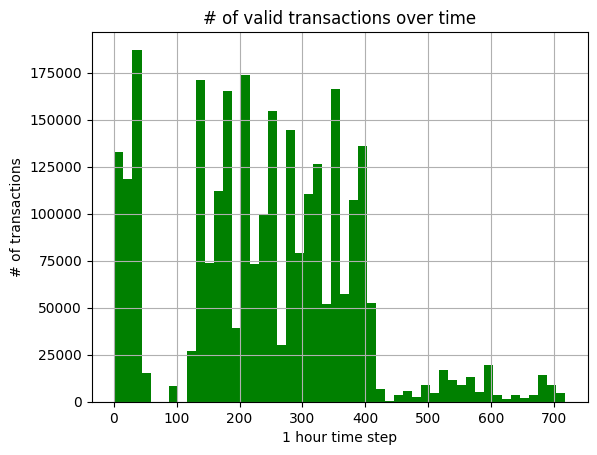

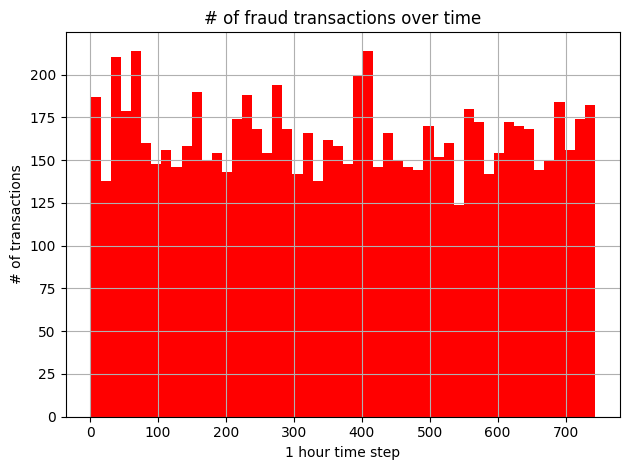

In [33]:
# Time patterns
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

**Observation:**

**There are stark difference between the step data between valid and fraud transactions.**

**A large proportion of valid transactions occur between around the 0th and 60th timestep. The frequency at which fraudulent transactions occur does not seem to change much over time.**

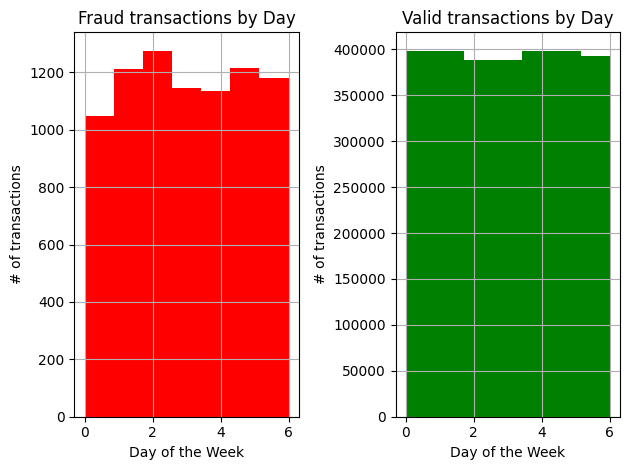

In [34]:
# getting hours and days of the week
num_days = 7
num_hours = 24
fraud_days = fraud.step % num_days
fraud_hours = fraud.step % num_hours
valid_days = valid.step % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

**Obseravtion:**

**There is little evidence to suggest that fraudulent transactions occur at particular days of the week. Much like valid transactions, fraudulent transactions seem to occur uniformally for each day of the week. Thus I won't make a feature showing what day of the week that the transaction occured.**

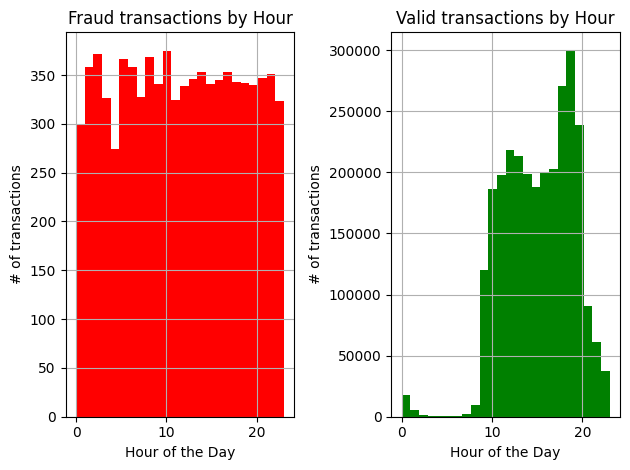

In [35]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

**Observation:**

**There is strong evidence to suggest that from hour 0 to hour 9 (inclusive) valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 (inclusive). In response to this, I will create another feature HourOfDay, which is the step column with each number taken to modulo 24.**

In [8]:
# adding feature HourOfDay to Dataset1 
data["HourOfDay"] = np.nan # initializing feature column
data.HourOfDay = data.step % 24

print("Head of dataset1: \n", pd.DataFrame.head(data))

Head of dataset1: 
     step      type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2      1  TRANSFER     181.00          181.0             0.0             0.0   
3      1  CASH_OUT     181.00          181.0             0.0         21182.0   
15     1  CASH_OUT  229133.94        15325.0             0.0          5083.0   
19     1  TRANSFER  215310.30          705.0             0.0         22425.0   
24     1  TRANSFER  311685.89        10835.0             0.0          6267.0   

    newbalanceDest  isFraud type2  errorBalanceOrg  errorBalanceDest  \
2             0.00        1    CC             0.00             181.0   
3             0.00        1    CC             0.00           21363.0   
15        51513.44        0    CC        213808.94          182703.5   
19            0.00        0    CC        214605.30          237735.3   
24      2719172.89        0    CC        300850.89        -2401220.0   

    HourOfDay  
2           1  
3           1  
15          1  
19

**Let's Check for amounts moved in transactions**

In [37]:
print("Summary statistics on the amounts moved in fraudulent transactions: \n",pd.DataFrame.describe(fraud.amount),"\n")
print("Summary statistics on the amounts moved in valid transactions: \n", pd.DataFrame.describe(valid.amount),"\n")

Summary statistics on the amounts moved in fraudulent transactions: 
 count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64 

Summary statistics on the amounts moved in valid transactions: 
 count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64 



In [38]:
print("Proportion of transactions where the amount moved is greater than 10 million: ", len(data[data.amount > 10000000])/len(data))

Proportion of transactions where the amount moved is greater than 10 million:  0.0008818192548464865


**Obseravtion:**

**It seems that during fraudulent transactions, the amount moved is capped at 10 million currency units. Whereas for valid transactions, the amount moved is capped at about 92.4 million currency units.**

# **Pre-Processing Data**

**The following encoding method captures the cyclic nature of time or any periodic variable (like hours in a day or months in a year) by representing the variable's values as angles on a unit circle.**

**Sine (sin) Function:**

**The sine function generates a periodic wave that oscillates between -1 and 1. When applied to a variable that represents time (or another cyclical variable), it maps the variable's values to corresponding points on the unit circle. The sine function has a value of 0 at 0 degrees, 90 degrees, 180 degrees, etc., and reaches its maximum value of 1 at 90 degrees (π/2 radians) and its minimum value of -1 at 270 degrees (3π/2 radians).**


**Cosine (cos) Function:**

**The cosine function is similar to the sine function, but its wave is shifted by 90 degrees. Like the sine function, the cosine function generates a periodic wave that oscillates between -1 and 1. The cosine function has a value of 1 at 0 degrees, 180 degrees, etc., and reaches its minimum value of -1 at 90 degrees (π/2 radians) and its maximum value of 1 at 270 degrees (3π/2 radians).**


**By using both the sine and cosine functions, you create a pair of transformed features that capture the cyclic nature of the original variable. Together, these two features provide a richer representation of the cyclic pattern than using only one function. The transformed features "step_sin" and "step_cos" allow the model to learn patterns that repeat over time, such as those related to hours of the day or days of the week. When using cyclical encoding, it's important to note that the original variable should be linearly scaled to fit within the range of 0 to 2π (or 0 to 360 degrees) before applying the sine and cosine functions. This ensures that the transformations are effective and capture the circular pattern accurately.**

In [9]:
def encode_cyclical_feature(df, column, max_value):
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

# Assuming max_value is 744 for 30 days (1 step = 1 hour)
max_value = 744

# Apply the cyclical encoding to the step feature
data = encode_cyclical_feature(data, 'step', max_value)

# Drop the original step column
data.drop(['step'], axis=1, inplace=True)

# Display the transformed DataFrame
print(data.head())

        type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2   TRANSFER     181.00          181.0             0.0             0.0   
3   CASH_OUT     181.00          181.0             0.0         21182.0   
15  CASH_OUT  229133.94        15325.0             0.0          5083.0   
19  TRANSFER  215310.30          705.0             0.0         22425.0   
24  TRANSFER  311685.89        10835.0             0.0          6267.0   

    newbalanceDest  isFraud type2  errorBalanceOrg  errorBalanceDest  \
2             0.00        1    CC             0.00             181.0   
3             0.00        1    CC             0.00           21363.0   
15        51513.44        0    CC        213808.94          182703.5   
19            0.00        0    CC        214605.30          237735.3   
24      2719172.89        0    CC        300850.89        -2401220.0   

    HourOfDay  step_sin  step_cos  
2           1  0.008445  0.999964  
3           1  0.008445  0.999964  
15          1 

**One-Hot Encoding:**

**After applying one-hot encoding, your DataFrame will have new columns such as "type_CASH-IN", "type_CASH-OUT", "type_DEBIT", "type_PAYMENT", and "type_TRANSFER", each containing binary values indicating the presence of a specific transaction type.**

In [10]:
data.drop(['type2'], axis=1, inplace=True)

# Display the transformed DataFrame
data.head(4)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrg,errorBalanceDest,HourOfDay,step_sin,step_cos
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,1,0.008445,0.999964
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,0.008445,0.999964
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,0.008445,0.999964
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,1,0.008445,0.999964


**Let's check for Mutlicollinearity:**

In [12]:
# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrg', 'errorBalanceDest', "HourOfDay", 'step_sin', 'step_cos']]
calc_vif(X)

,variables,VIF
0,amount,4.334552e+12
1,oldbalanceOrg,1.471116e+11
2,newbalanceOrig,5.182717e+10
3,oldbalanceDest,3.234067e+11
4,newbalanceDest,4.102069e+10
5,errorBalanceOrg,1.015494e+09
6,errorBalanceDest,1.380837e+12
7,HourOfDay,2.072154e+00
8,step_sin,1.750752e+00
9,step_cos,1.095866e+00


**Observation: Dropping 'amount', 'oldbalanceOrg', 'oldbalanceDest' will help to overcome the problem of Multicollinearity**

In [32]:
X = data.drop(['isFraud', 'amount', 'oldbalanceOrg', 'oldbalanceDest'], 1)
y = data.isFraud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_train.head(4)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1736\4251428495.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['isFraud', 'amount', 'oldbalanceOrg', 'oldbalanceDest'], 1)


,type,newbalanceOrig,newbalanceDest,errorBalanceOrg,errorBalanceDest,HourOfDay,step_sin,step_cos
5781314,CASH_OUT,0.00,27260640.57,527601.89,0.0,16,-0.234266,-0.972172
2404798,CASH_OUT,398812.82,1412642.67,0.00,0.0,10,0.990885,-0.134711
1478812,CASH_OUT,0.00,936334.94,89745.84,0.0,21,0.928653,0.370950
5174261,CASH_OUT,0.00,167426.86,161301.86,0.0,22,0.117957,-0.993019


# **Model 1:**

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier

trf_1 = ColumnTransformer(
    [('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [0])],
    remainder ='passthrough'
)

# Create resampling method
resample = SMOTEENN(random_state=101)

# Create a column transformer for preprocessing
trf_2 = ColumnTransformer(
    transformers=[('ss', StandardScaler(), [1, 2, 3, 4])],
    remainder='passthrough'
)

# Model Built Using ANOVA f-test Features
fs = SelectKBest(score_func=f_classif, k=6)

# Create a Random Forest classifier from imblearn
rf = BalancedRandomForestClassifier(n_jobs=-1, n_estimators=64)

# Create the pipeline
pipe_1 = Pipeline([
    ('step1', trf_1),
    ('step2', resample),
    ('step3', trf_2),
    ('step4', fs),
    ('step5', rf)
])

# **Hyper-Parameter Tuning for Model 1:**

In [59]:
criterion = ['gini', 'entropy']
max_features= ['sqrt', 'log2', 6]
max_samples = [0.85, 0.95]
bootstrap = [True, False]


param_grid = {'step5__max_features':max_features,
             'step5__criterion': criterion,
             'step5__max_samples': max_samples,
             'step5__bootstrap': bootstrap
            }  

In [60]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats= 1, random_state=101)
search = RandomizedSearchCV(pipe_1, param_grid, n_jobs=-1, n_iter=1, scoring= 'roc_auc', cv=cv)
search.fit(X_train, y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=101),
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [0])])),
                                             ('step2',
                                              SMOTEENN(random_state=101)),
                                             ('step3',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ss',
                                                                               StandardScaler(),
                                                                               [1,
                                                                                2,
                                                                                3,
                                                                                4])])),
                                             ('step4', SelectKBest(k=6)),
                                             ('step5',
                                              BalancedRandomForestClassifier(n_estimators=64,
                                                                             n_jobs=-1))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'step5__bootstrap': [True, False],
                                        'step5__criterion': ['gini', 'entropy'],
                                        'step5__max_features': ['sqrt', 'log2',
                                                                6],
                                        'step5__max_samples': [0.85, 0.95]},
                   scoring='roc_auc')

# **Evaluation of Model 1:**

In [61]:
print("Parameters of Best Estimator in Model: ")
print(search.best_params_)
print("Best score in grid search:")
print(search.best_score_)
print(search.best_estimator_.get_params())

Parameters of Best Estimator in Model: 
{'step5__max_samples': 0.95, 'step5__max_features': 'log2', 'step5__criterion': 'gini', 'step5__bootstrap': False}
Best score in grid search:
0.9786849377438355
{'memory': None, 'steps': [('step1', ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [0])])), ('step2', SMOTEENN(random_state=101)), ('step3', ColumnTransformer(remainder='passthrough',
                  transformers=[('ss', StandardScaler(), [1, 2, 3, 4])])), ('step4', SelectKBest(k=6)), ('step5', BalancedRandomForestClassifier(bootstrap=False, max_features='log2',
                               max_samples=0.95, n_estimators=64, n_jobs=-1))], 'verbose': False, 'step1': ColumnTransformer(remainder='passthrough',
                 

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,precision_score

y_pred = search.predict(X_test)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test, y_pred)
fpr, recall, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, recall)

results = {"Confusion Matrix ": CM,"Classification Report ": CR, "Area Under Curve ": AUC}

In [66]:
for measure in results:
    print(measure,": \n",results[measure],"\n")

Confusion Matrix  : 
 [[552268    152]
 [   485   1177]] 

Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552420
           1       0.89      0.71      0.79      1662

    accuracy                           1.00    554082
   macro avg       0.94      0.85      0.89    554082
weighted avg       1.00      1.00      1.00    554082
 

Area Under Curve  : 
 0.8539538795953532 



# **Model 2:**

In [46]:
import xgboost as xgb

fs = SelectKBest(score_func=f_classif, k=6)

xgbr = xgb.XGBClassifier(n_estimators = 64, objective="binary:logistic", random_state=42, n_jobs = -1, eval_metric='logloss')

pipe_2 = Pipeline([
    ('step1', trf_1),
    ('step2', resample),
    ('step3', trf_2),
    ('step4', fs),
    ('step5', xgbr)
])


param_grid = {
    "step5__learning_rate": np.linspace(0.03, 0.6, 3),
    'step5__gamma': [0.3, 0.7],
    'step5__reg_lambda': [0, 1.0, 10],
    "step5__colsample_bynode": [0.7, 0.90]
}

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats= 1, random_state=42)
search = RandomizedSearchCV(pipe_2, param_grid, n_jobs=-1, n_iter=1, scoring= 'roc_auc', cv=cv)
search.fit(X_train, y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=3, random_state=42),
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [0])])),
                                             ('step2',
                                              SMOTEENN(random_state=101)),
                                             ('step3',
                                              ColumnTransformer(remainder='passthrough',
                                                                trans...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=64,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=42, ...))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'step5__colsample_bynode': [0.7, 0.9],
                                        'step5__gamma': [0.3, 0.7],
                                        'step5__learning_rate': array([0.03 , 0.315, 0.6  ]),
                                        'step5__reg_lambda': [0, 1.0, 10]},
                   scoring='roc_auc')

# **Evaluation of Model 2:**

In [47]:
print("Parameters of Best Estimator in Model: ")
print(search.best_params_)
print("Best score in grid search:")
print(search.best_score_)
print(search.best_estimator_.get_params())

Parameters of Best Estimator in Model: 
{'step5__reg_lambda': 10, 'step5__learning_rate': 0.6, 'step5__gamma': 0.3, 'step5__colsample_bynode': 0.9}
Best score in grid search:
0.9928438506418372
{'memory': None, 'steps': [('step1', ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [0])])), ('step2', SMOTEENN(random_state=101)), ('step3', ColumnTransformer(remainder='passthrough',
                  transformers=[('ss', StandardScaler(), [1, 2, 3, 4])])), ('step4', SelectKBest(k=6)), ('step5', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.9,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logl

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,precision_score

y_pred = search.predict(X_test)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test, y_pred)
fpr, recall, thresholds = roc_curve(y_test, y_pred)
AUC = auc(fpr, recall)

results = {"Confusion Matrix ": CM,"Classification Report ": CR, "Area Under Curve ": AUC}

In [52]:
for measure in results:
    print(measure,": \n",results[measure],"\n")

Confusion Matrix  : 
 [[552234    186]
 [   432   1230]] 

Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552420
           1       0.87      0.74      0.80      1662

    accuracy                           1.00    554082
   macro avg       0.93      0.87      0.90    554082
weighted avg       1.00      1.00      1.00    554082
 

Area Under Curve  : 
 0.8698677509146823 



# **Performance of the Model:**

- **Precision:   The precision for class 1 (fraudulent transactions) is 0.87, which means that out of all the predicted positive instances, 87% were actually fraudulent.**

- **Recall:   The recall for class 1 is 0.74, indicating that the model correctly identified 74% of the actual fraudulent transactions.**

- **F1-score:   The F1-score for class 1 is 0.80, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's accuracy for class 1.**

- **Area Under the Curve (AUC-ROC):   The AUC-ROC value is 0.87, which indicates the model's ability to distinguish between positive and negative classes. An AUC value closer to 1 suggests a better-performing model, while a value of 0.5 suggests random performance.**

# **Result:**

**Model 2 is working fine than Model 1.**

**Initially, we analyze an imbalanced dataset. Thus, we utilized SMOTEENN technique for balancing the dataset, created a representative training set. Then, ensured uniform feature scales using standard scaling and employed One-Hot Encoding to transform categorical variables. For feature selection, we have use the SelectKBest method which selects the top 'k' features based on the ANOVA F-value between the feature and target variables. For training purpose, We've used ensemble learning technique called Extreme Gradient Boosting that combines multiple weak learners (usually decision trees) to create a strong predictive model. Also, Employed Hyper-Parameter tuning with RandomizedSearchCV. And whole model is created in a Machine Learning Pipeline for consistency and reproducibility.**

# **Observation:**

**1. Fradulent Transactions is from Customer to Customer transaction where the transaction type is 'TRANSFER' or 'CASH_OUT'.**

**2. For fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.**

**3. From hour 0 to hour 9, valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day**

**4. Many of the observations have inaccurately portrayed what happens to the account receiving money and the account sending money.**

# **Question:**

**Q1: What kind of prevention should be adopted while company update its infrastructure?**

**Answer:**

**1. Thorough Planning and Risk Assessment:**
**Before making any changes to the infrastructure, conduct a thorough risk assessment to identify potential vulnerabilities and risks associated with the update.**

**2. Data Backup and Recovery Plan:**
**Implement a robust backup and recovery plan to ensure that critical data is backed up before any updates are made. This helps to prevent data loss in case of unforeseen issues during the update process.**

**3. Access Control and Authentication:**
**Implement strong access controls and authentication mechanisms to restrict unauthorized access to the updated infrastructure. Use multi-factor authentication (MFA) where possible to enhance security.**

**4. Scalability and Redundancy:**
**Design the updated infrastructure with scalability and redundancy in mind. This ensures that the system can handle increased load and that there are backup components in place in case of failures.**


**By incorporating these prevention measures into the infrastructure update process, a company can minimize risks, ensure the security of sensitive data, and maintain the reliability of its systems.**



**Q2: Assuming these actions have been implemented, how would you determine if they work?**

**Answer:**

**1. Security Audits and Penetration Testing:**
**Regularly conduct security audits and penetration testing to identify any vulnerabilities or weaknesses in the updated infrastructure. This involves simulating real-world attacks to assess the infrastructure's resilience and the effectiveness of security controls.**

**2. Continuous Monitoring:**
**Implement continuous monitoring systems that track network traffic, user activities, and system behavior. Anomalies and suspicious activities can be detected in real-time, allowing for swift action.**

**3.Incident and Breach Tracking:**
**Monitor incidents and breaches to determine if any occurred despite the preventive measures. Analyze the causes of such incidents and adjust the prevention measures accordingly. Stay informed about emerging threats and vulnerabilities in your industry. If new threats emerge, assess whether your prevention measures address these new risks effectively.**



# **Thank You..!**